In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PowerTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn import metrics

# Load the dataset
df = pd.read_csv("Dataset1_clean.csv")

# -----------------------------
# Data Cleaning & Feature Engineering
# -----------------------------

# Remove rows with missing values in key columns
df = df.dropna(subset=['seconds_after_rat_arrival', 'hours_after_sunset', 'reward', 'fight', 'habit'])

# Create vigilance level from seconds_after_rat_arrival
def categorize_vigilance(seconds):
    if seconds < 150:
        return 'Low'
    elif seconds < 300:
        return 'Medium'
    else:
        return 'High'
df['vigilance_level'] = df['seconds_after_rat_arrival'].apply(categorize_vigilance)

# Selected Explanatory Variables

# seconds_after_rat_arrival
# hours_after_sunset
# reward
# fight
# habit
# vigilance_level
# night_period

# Create night period from hours_after_sunset
df['night_period'] = df['hours_after_sunset'].apply(lambda x: 'Early' if x < 6 else 'Late')

# -----------------------------
# Define Features and Target
# -----------------------------
# Explanatory variables selected in Assignment 2
X = df[['vigilance_level', 'night_period', 'reward', 'fight', 'habit']]
y = df['risk']  # Binary response variable: 0 = avoidance, 1 = risk-taking

# -----------------------------
# Preprocessing Pipeline
# -----------------------------
categorical_features = ['vigilance_level', 'night_period', 'habit']
numerical_features = ['reward', 'fight']

preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('scaler', StandardScaler()),  # Standardization
        ('power', PowerTransformer(method='yeo-johnson'))  # Normalize distribution
    ]), numerical_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features)  # One-hot encoding
])

# -----------------------------
# Train-Test Split (70/30)
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# -----------------------------
# Build and Train MLR Model
# -----------------------------
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

pipeline.fit(X_train, y_train)

# -----------------------------
# Evaluate Model Performance
# -----------------------------
y_pred = pipeline.predict(X_test)

# Metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
r2 = metrics.r2_score(y_test, y_pred)
rmse_norm = rmse / (y.max() - y.min())

# Adjusted R²
n = len(y_test)
p = pipeline.named_steps['preprocessor'].transform(X_test).shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# -----------------------------
# Print Evaluation Results
# -----------------------------
print("Evaluation Metrics for Multiple Linear Regression Model (70/30 Split):\n")
print(f"Intercept: {pipeline.named_steps['regressor'].intercept_:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"RMSE (Normalised): {rmse_norm:.4f}")
print(f"R²: {r2:.4f}")
print(f"Adjusted R²: {adjusted_r2:.4f}")

# -----------------------------
# Actual vs Predicted Output
# -----------------------------
df_pred = pd.DataFrame({"Actual": y_test.values, "Predicted": y_pred})
print("\n Actual vs Predicted Risk Behaviour (Sample):")
print(df_pred.head())

# -----------------------------
# Baseline Model Comparison
# -----------------------------
y_base = np.mean(y_train)
y_pred_base = [y_base] * len(y_test)

mae_base = metrics.mean_absolute_error(y_test, y_pred_base)
mse_base = metrics.mean_squared_error(y_test, y_pred_base)
rmse_base = math.sqrt(mse_base)
rmse_norm_base = rmse_base / (y.max() - y.min())
r2_base = metrics.r2_score(y_test, y_pred_base)

print("\n Baseline Model Performance (Mean Prediction):")
print(f"MAE: {mae_base:.4f}")
print(f"MSE: {mse_base:.4f}")
print(f"RMSE: {rmse_base:.4f}")
print(f"RMSE (Normalised): {rmse_norm_base:.4f}")
print(f"R²: {r2_base:.4f}")

# -----------------------------
# Regression Coefficients Bar Chart
# -----------------------------
# Extract feature names after preprocessing
feature_names = pipeline.named_steps['preprocessor'].transform(X_train).shape[1]
encoded_feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()
coefficients = pipeline.named_steps['regressor'].coef_

# # Plot bar chart
# plt.figure(figsize=(12, 6))
# plt.bar(encoded_feature_names, coefficients)
# plt.xticks(rotation=45, ha='right')
# plt.title("Regression Coefficients for Predicting Bat Risk Behaviour")
# plt.ylabel("Coefficient Value")
# plt.tight_layout()
# plt.show()


Evaluation Metrics for Multiple Linear Regression Model (70/30 Split):

Intercept: 1.0084
MAE: 0.0514
MSE: 0.0160
RMSE: 0.1265
RMSE (Normalised): 0.1265
R²: 0.9357
Adjusted R²: 0.9334

 Actual vs Predicted Risk Behaviour (Sample):
   Actual  Predicted
0       1   0.135140
1       1   0.997304
2       0   0.150303
3       0   0.134550
4       0   0.007233

 Baseline Model Performance (Mean Prediction):
MAE: 0.5017
MSE: 0.2523
RMSE: 0.5023
RMSE (Normalised): 0.5023
R²: -0.0138


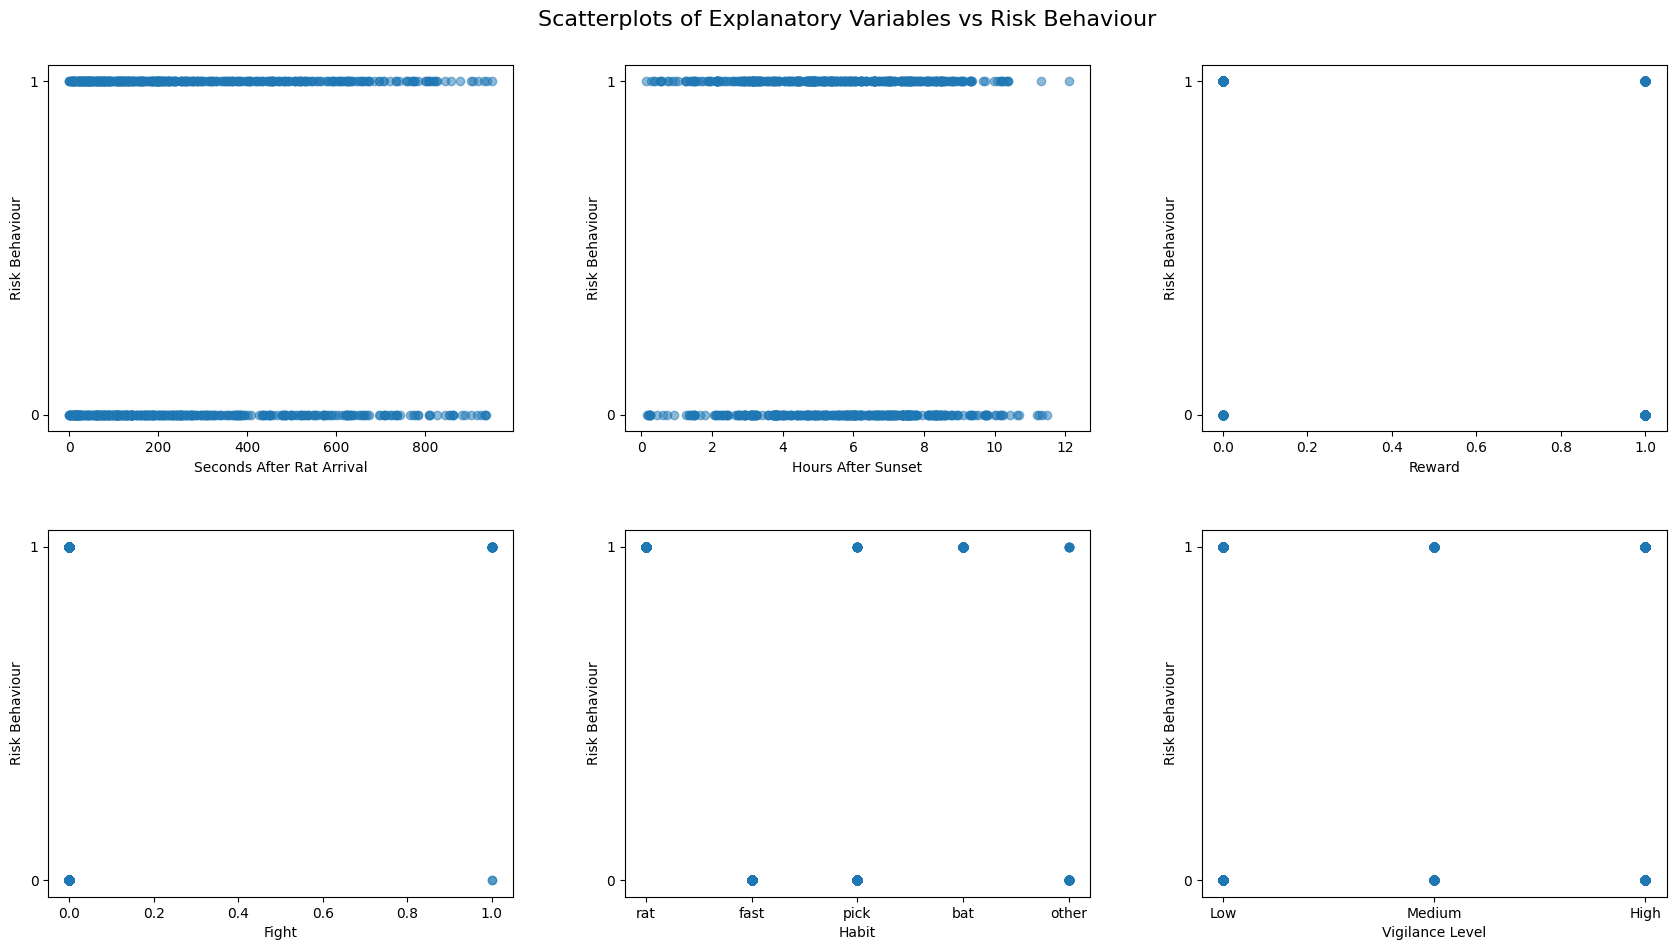

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Dataset1_clean.csv")

# Drop rows with missing values in relevant columns
df = df.dropna(subset=['seconds_after_rat_arrival', 'hours_after_sunset', 'reward', 'fight', 'habit'])

# Feature engineering for vigilance_level and night_period
def categorize_vigilance(seconds):
    if seconds < 150:
        return 'Low'
    elif seconds < 300:
        return 'Medium'
    else:
        return 'High'
df['vigilance_level'] = df['seconds_after_rat_arrival'].apply(categorize_vigilance)
df['night_period'] = df['hours_after_sunset'].apply(lambda x: 'Early' if x < 6 else 'Late')

# Create a figure with multiple scatterplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.tight_layout(pad=5.0)

# Scatterplot 1: Seconds After Rat Arrival vs Risk
axs[0, 0].scatter(df['seconds_after_rat_arrival'], df['risk'], alpha=0.5)
axs[0, 0].set_xlabel("Seconds After Rat Arrival")
axs[0, 0].set_ylabel("Risk Behaviour")
axs[0, 0].set_yticks([0, 1])

# Scatterplot 2: Hours After Sunset vs Risk
axs[0, 1].scatter(df['hours_after_sunset'], df['risk'], alpha=0.5)
axs[0, 1].set_xlabel("Hours After Sunset")
axs[0, 1].set_ylabel("Risk Behaviour")
axs[0, 1].set_yticks([0, 1])

# Scatterplot 3: Reward vs Risk
axs[0, 2].scatter(df['reward'], df['risk'], alpha=0.5)
axs[0, 2].set_xlabel("Reward")
axs[0, 2].set_ylabel("Risk Behaviour")
axs[0, 2].set_yticks([0, 1])

# Scatterplot 4: Fight vs Risk
axs[1, 0].scatter(df['fight'], df['risk'], alpha=0.5)
axs[1, 0].set_xlabel("Fight")
axs[1, 0].set_ylabel("Risk Behaviour")
axs[1, 0].set_yticks([0, 1])

# Scatterplot 5: Habit vs Risk
axs[1, 1].scatter(df['habit'], df['risk'], alpha=0.5)
axs[1, 1].set_xlabel("Habit")
axs[1, 1].set_ylabel("Risk Behaviour")
axs[1, 1].set_yticks([0, 1])

# Scatterplot 6: Vigilance Level vs Risk
axs[1, 2].scatter(df['vigilance_level'], df['risk'], alpha=0.5)
axs[1, 2].set_xlabel("Vigilance Level")
axs[1, 2].set_ylabel("Risk Behaviour")
axs[1, 2].set_yticks([0, 1])

# Add a title to the figure
plt.suptitle("Scatterplots of Explanatory Variables vs Risk Behaviour", fontsize=16)

# Save the figure
plt.savefig("scatterplots_explanatory_vs_risk.png")
plt.show()

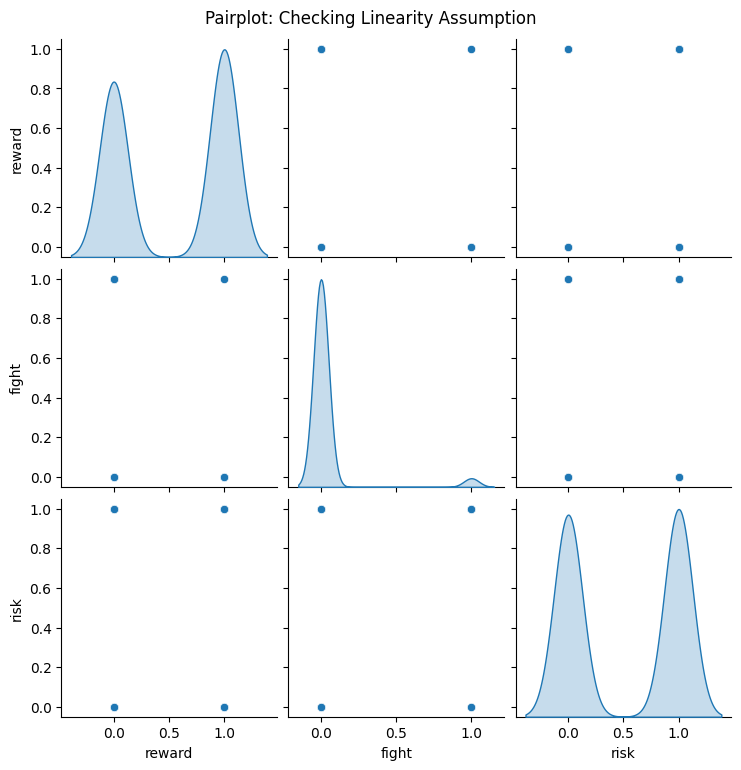

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine predictors and target into one DataFrame
df_check = pd.concat([X, y], axis=1)

# Pairplot to visualize relationships
sns.pairplot(df_check, diag_kind="kde")
plt.suptitle("Pairplot: Checking Linearity Assumption", y=1.02)
plt.show()

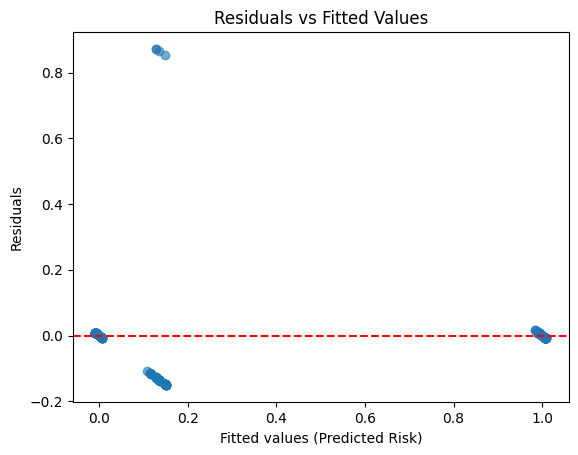

In [4]:
import numpy as np

# Get predictions and residuals
y_pred = pipeline.predict(X_test)
residuals = y_test - y_pred

plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Fitted values (Predicted Risk)")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()

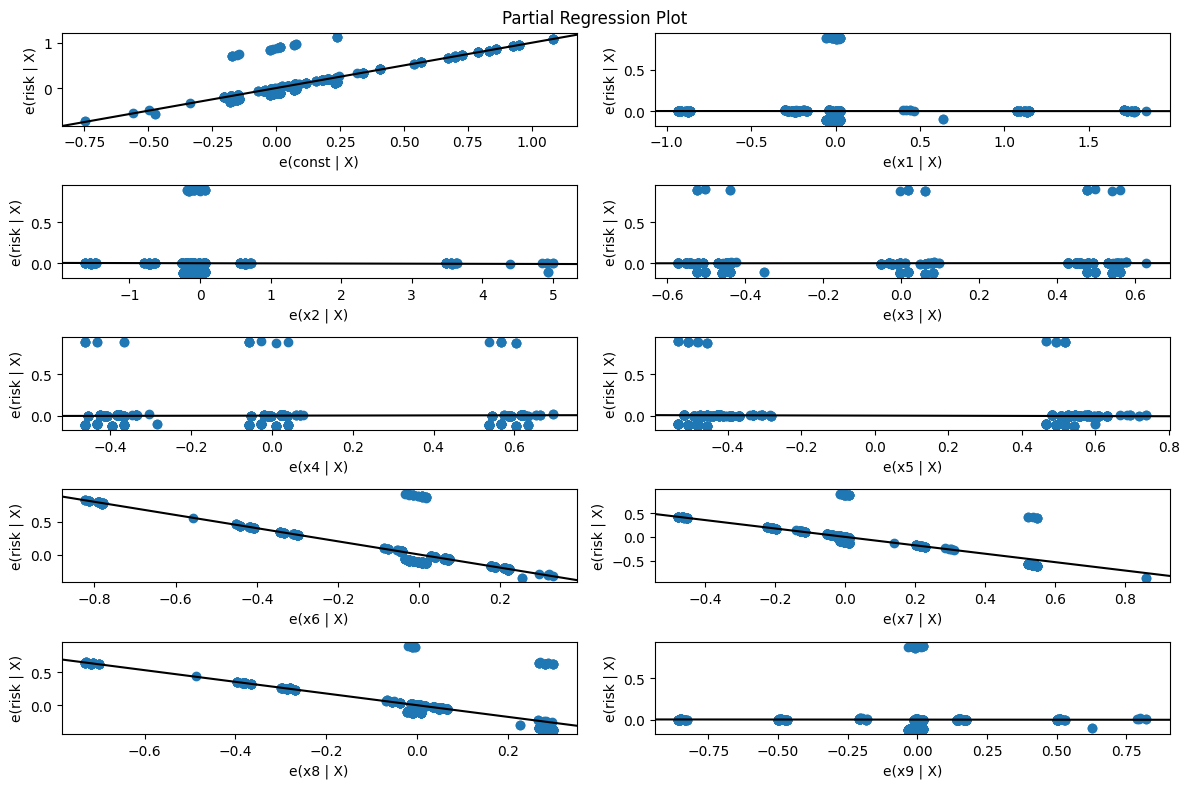

In [5]:
import statsmodels.api as sm

# Add constant for intercept
X_sm = sm.add_constant(preprocessor.fit_transform(X))
model = sm.OLS(y, X_sm).fit()

sm.graphics.plot_partregress_grid(model, fig=plt.figure(figsize=(12,8)))
plt.show()

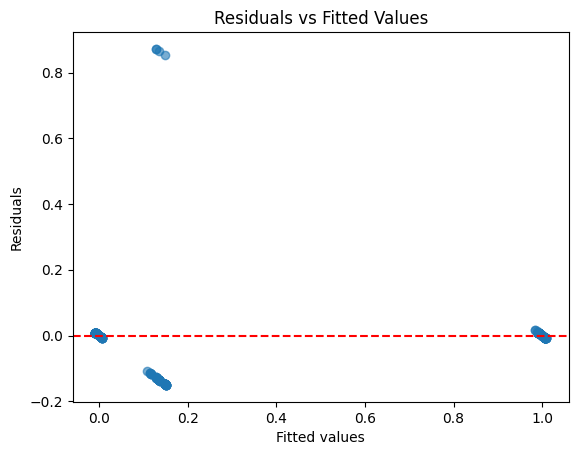

In [6]:
# Explicitly Check Assumptions
# Linearity
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()

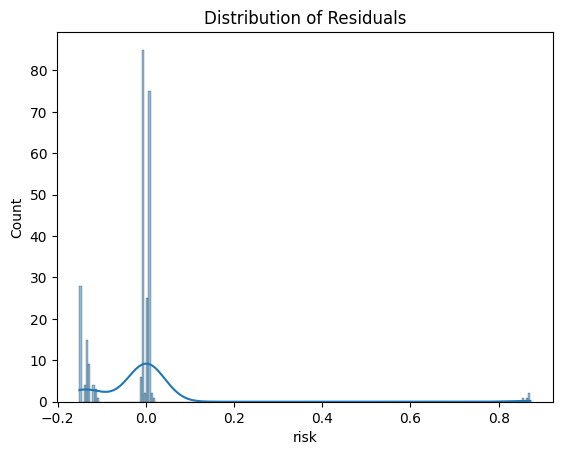

In [7]:
# - Normality of residuals
import seaborn as sns
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.show()

In [8]:
# - Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

X_vif = sm.add_constant(preprocessor.fit_transform(X))
vif = [variance_inflation_factor(X_vif, i) for i in range(X_vif.shape[1])]
print("VIF values:", vif)

VIF values: [np.float64(11.718469111709103), np.float64(3.8872970865467256), np.float64(1.2768712056707876), np.float64(1.2792191464332903), np.float64(1.2756362414100126), np.float64(1.0136173721708672), np.float64(3.62048641767473), np.float64(1.7022842373158962), np.float64(2.924822336589763), np.float64(3.1350825940583946)]


In [9]:
# Optimisation Techniques
# Optimisation Techniques
# Regularisation

from sklearn.linear_model import Ridge, Lasso

ridge = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1.0))
])
ridge.fit(X_train, y_train)
print("R² (Ridge):", ridge.score(X_test, y_test))

R² (Ridge): 0.9334448972563263


In [10]:
# Cross-validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')
print("Cross-validated R²:", scores.mean())

Cross-validated R²: 0.8962085032339571


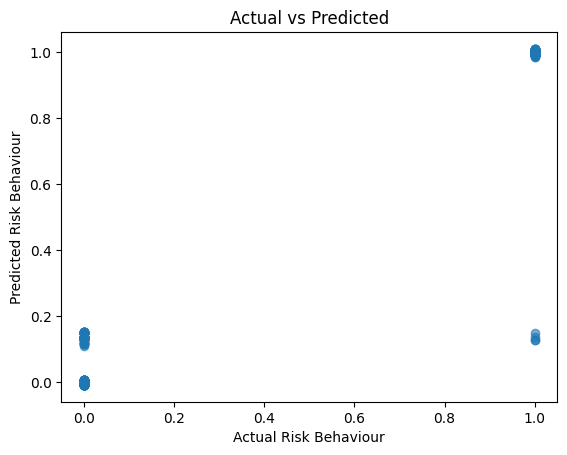

In [11]:
# Visualise Model Fit
# Actual vs Predicted plot
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Risk Behaviour")
plt.ylabel("Predicted Risk Behaviour")
plt.title("Actual vs Predicted")
plt.show()

In [12]:
# # Supporting Evidence from Your Analysis and the Project
# # 1. MLR Model Performance

# # Your model predicts bat risk-taking behaviour with very high accuracy (R² = 0.9357).
# # The explanatory variables (e.g. fight, habit, reward, night period) significantly influence risk behaviour.
# # Predictions closely match actual binary outcomes (0 = avoidance, 1 = risk-taking).

# # 2. Project Findings from the PDF [Bat vs Rat]


# # Habit Contexts:

# # Bats always took risks in "rat" and "bat" contexts.
# # They mostly avoided risk in "fast", "pick", and "other" contexts.
# # ➤ This suggests bats recognize rats as a threat, not just a competitor.



# # Fight vs Risk:

# # When fights occurred, 94.3% of bats took risks.
# # ➤ Indicates defensive or threat-driven behaviour, typical of predator response.



# # Reward vs Risk:

# # Bats often took risks even without reward.
# # ➤ Suggests urgency or fear, not just food competition.



# # Timing (Night Period):

# # Risk-taking was higher in early night, possibly to avoid active rats.
# # ➤ Shows strategic behaviour to minimize danger.


# The combination of statistical evidence, behavioural patterns, and predictive modelling confirms that bats do perceive rats as potential predators, not merely as competitors for food. Their risk-taking behaviour is influenced by threat awareness, defensive responses, and strategic timing — all hallmarks of predator-prey dynamics.

In [13]:
# used Multiple Linear Regression (MLR) to model the relationship between several explanatory variables and the binary response variable risk.

# used a 70/30 split, which is a standard practice to train the model on one portion and test its generalization on unseen data.

# evaluated the model using:  - MAE (Mean Absolute Error)  - MSE (Mean Squared Error)  - RMSE (Root Mean Squared Error)  - Normalised RMSE  - R² and Adjusted R²

# compared our MLR model to a dummy model that predicts the mean of the training data. This showed our model performs significantly better.


# Feature Engineering - created new variables:  - vigilance_level from seconds_after_rat_arrival  - night_period from hours_after_sunset

# From Week 9: Model Optimization & Interpretation

# Categorical Encoding - Used One-Hot Encoding for habit, vigilance_level, and night_period

# Data Transformation - Applied Yeo-Johnson Power Transformation to normalize reward and fight

# Standardization - Used StandardScaler to scale numerical features

# Model Interpretation - Visualized regression coefficients to understand the influence of each variable

# Data Storytelling - Used scatterplots to visually communicate how each variable relates to risk behaviour, with binary y-axis formatting for clarity



# Strong Predictive Power: Your model explains 93.57% of the variance in bat risk-taking behaviour.
# Key Predictors:

# Habit: Bats always took risks in “rat” and “bat” contexts.
# Fight: 94.3% of bats took risks when fights occurred.
# Reward: Bats often took risks even without reward — suggesting fear or urgency.
# Night Period: Bats took more risks early in the night, possibly to avoid rats.


# Conclusion: These behaviours are consistent with predator avoidance, not just food competition.

